In [2]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 1.4 MB/s eta 0:01:32
   ---------------------------------------- 0.4/124.9 MB 2.2 MB/s eta 0:00:57
   ---------------------------------------- 1.1/124.9 MB 3.9 MB/s eta 0:00:33
   ---------------------------------------- 1.4/124.9 MB 4.2 MB/s eta 0:00:30
    --------------------------------------- 1.7/124.9 MB 4.5 MB/s eta 0:00:28
    --------------------------------------- 2.1/124.9 MB 4.9 MB/s eta 0:00:26
    --------------------------------------- 2.4/124.9 MB 4.8 MB/s eta 0:00:26
    --------------------------------------- 2.8/124.9 MB 5.2 MB/s eta 0:00:24
   - -------------------------------------- 3.2/124.9 MB 5.5 MB/s eta 0:00:22
   - -------------------------------------- 3.7/124.9 MB 6.1 MB/s eta 0:00:20
   - -------------------------------------- 4.0/124.9 MB 6.1 MB/s eta 0

In [54]:
import numpy as np 
import pandas as pd 
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv('boston.csv')

In [6]:

data.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
data.shape

(506, 15)

In [14]:
correlation = data.corr()

In [13]:
plt.figure(figsize = (14,14))

<Figure size 1400x1400 with 0 Axes>

<Figure size 1400x1400 with 0 Axes>

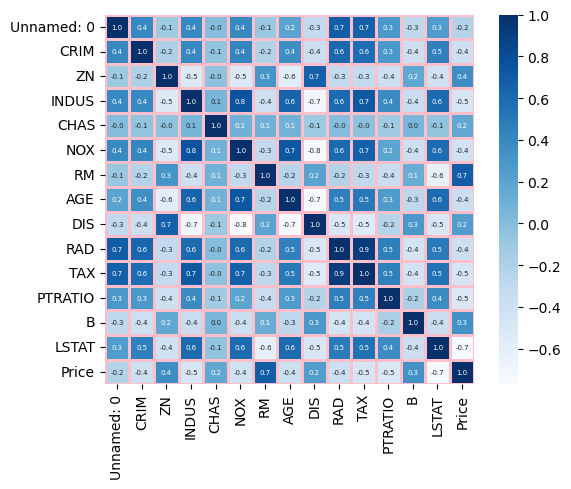

In [25]:
sns.heatmap(correlation, cmap = 'Blues',annot = True, annot_kws = {'size':5}, fmt = '.1f',square = True,linewidths = 1,linecolor = 'pink')
plt.show()

In [26]:
X = data.drop('Price',axis = 1)
Y = data.Price

In [27]:
X.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [28]:
Y.value_counts()

Price
50.0    16
25.0     8
22.0     7
21.7     7
23.1     7
        ..
32.9     1
34.6     1
30.3     1
33.3     1
8.1      1
Name: count, Length: 229, dtype: int64

In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 23)

By using XGBRegressor model

In [30]:
model = XGBRegressor()

In [31]:
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [33]:
prediction = model.predict(X_train)

In [38]:
train_data_accuracy = mean_squared_error(prediction, Y_train)

In [39]:
print('accuracy of train data is ', train_data_accuracy)

accuracy of train data is  0.0002454477375664479


In [44]:
X_test_prediction = model.predict(X_test)

In [45]:
test_data_accuracy = mean_squared_error(X_test_prediction, Y_test)

In [46]:
print('accuracy of test data is ',test_data_accuracy)

accuracy of test data is  13.63222781724265


In [50]:
plt.figure(figsize = (12,12))

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

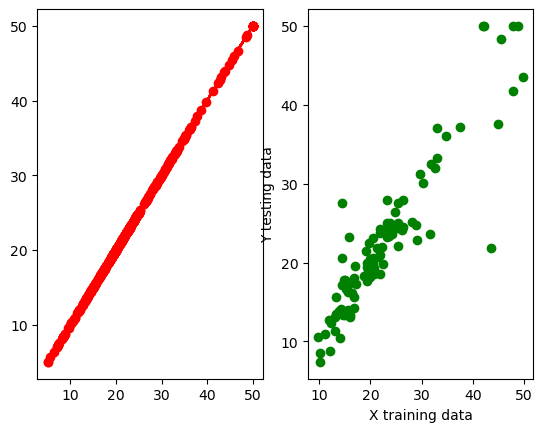

In [53]:
plt.subplot(1,2,1)

plt.plot(prediction, Y_train, color = 'r', marker = 'o')
plt.subplot(1,2,2)
plt.scatter(X_test_prediction, Y_test, color = 'g', marker = 'o')
plt.xlabel('X training data')
plt.ylabel('Y testing data')
plt.show()

By using Linear Regression Model

In [55]:
model_2 = LinearRegression()

In [57]:
model_2.fit(X_train,Y_train)

LinearRegression()

In [58]:
prediction_2 = model_2.predict(X_train)

In [60]:
model_2_train_accuracy = mean_squared_error(prediction_2, Y_train)

In [61]:
print('model 2 accuracy is ',model_2_train_accuracy)

model 2 accuracy is  21.919180437695157


In [62]:
model_2_test_prediction = model_2.predict(X_test)

In [63]:
model_2_test_accuracy = mean_squared_error(model_2_test_prediction, Y_test)

In [66]:
print('model 2 test accuracy is ',model_2_test_accuracy)

model 2 test accuracy is  22.0500470050983


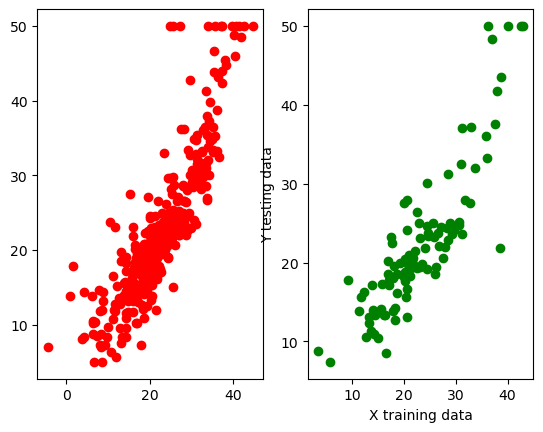

In [68]:
plt.subplot(1,2,1)

plt.scatter(prediction_2, Y_train, color = 'r', marker = 'o')
plt.subplot(1,2,2)
plt.scatter(model_2_test_prediction, Y_test, color = 'g', marker = 'o')
plt.xlabel('X training data')
plt.ylabel('Y testing data')
plt.show()

making prediction

In [70]:
sample_data = np.array([123,0.15038,0.0,25.65,0.0,0.581,5.856,97.0,1.9444,2.0,188.0,19.1,370.31,25.41])
sp = sample_data.reshape(1,-1)
output = model.predict(sp)
print('the price is ',output)

the price is  [17.244556]


In [71]:
sample_data = np.array([123,0.15038,0.0,25.65,0.0,0.581,5.856,97.0,1.9444,2.0,188.0,19.1,370.31,25.41])
sp = sample_data.reshape(1,-1)
output = model_2.predict(sp)
print('the price is ',output)

the price is  [15.79447199]


C:\Users\chunc\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
